## MLFP PROJECT

- The class and assignment- MLFP 90803, Sprint 3
- Team Name- Team 13
- Sara Clemente, Gracie Siu, Sharon John
- Explanations where needed for your tasks are provided in each cell.}


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
import plotly.express as px

In [35]:
#load in gender data (x variables)
gender = pd.read_csv('Gender_StatsData.csv')
gender.head()

Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name  Indicator Code  1960  \
0  A woman can apply for a passport in the same w...  SG.APL.PSPT.EQ   NaN   
1  A woman can be head of household in the same w...  SG.HLD.HEAD.EQ   NaN   
2  A woman can choose where to live in the same w...  SG.LOC.LIVE.EQ   NaN   
3  A woman can get a job in the same way as a man...  SG.GET.JOBS.EQ   NaN   
4  A woman can obtain a judgment of divorce in th...  SG.OBT.DVRC.EQ   NaN   

   1961  1962  1963  1964  1965  ...  2013  2014  2015  2016  2017  2018  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2019  2020  2021  2022  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN  

[5 rows x 67 columns]

In [36]:
#drop country code, contains repetitive data
gender = gender.drop(columns=['Indicator Code'])

### Transform and Restructure Data

In [37]:
#transform the data to a wide format
gender_melted = pd.melt(gender, id_vars=['Country Name', 'Country Code', 'Indicator Name'],
                        var_name = 'Year',
                        value_name='Value')

#view the melted df
gender_melted.head()

Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name  Year  Value  
0  A woman can apply for a passport in the same w...  1960    NaN  
1  A woman can be head of household in the same w...  1960    NaN  
2  A woman can choose where to live in the same w...  1960    NaN  
3  A woman can get a job in the same way as a man...  1960    NaN  
4  A woman can obtain a judgment of divorce in th...  1960    NaN

In [39]:
#use pivot to transform the data again and make the years row data
gender_melted_pivot = pd.pivot_table(gender_melted, index=['Country Name', 'Country Code', 'Year'], columns='Indicator Name', values='Value', aggfunc='first').reset_index()

#view the restructured df
gender_melted_pivot.head()

Indicator Name Country Name Country Code  Year  \
0               Afghanistan          AFG  1960   
1               Afghanistan          AFG  1961   
2               Afghanistan          AFG  1962   
3               Afghanistan          AFG  1963   
4               Afghanistan          AFG  1964   

Indicator Name  A woman can apply for a passport in the same way as a man (1=yes; 0=no)  \
0                                                             NaN                         
1                                                             NaN                         
2                                                             NaN                         
3                                                             NaN                         
4                                                             NaN                         

Indicator Name  A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                             NaN                         
1                                                             NaN                         
2                                                             NaN                         
3                                                             NaN                         
4                                                             NaN                         

Indicator Name  A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                             NaN                         
1                                                             NaN                         
2                                                             NaN                         
3                                                             NaN                         
4                                                             NaN                         

Indicator Name  A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                             NaN              
1                                                             NaN              
2                                                             NaN              
3                                                             NaN              
4                                                             NaN              

Indicator Name  A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                             NaN                                 
1                                                             NaN                                 
2                                                             NaN                                 
3                                                             NaN                                 
4                                                             NaN                                 

Indicator Name  A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
0                                                             NaN                        
1                                                             NaN                        
2                                                             NaN                        
3                                                             NaN                        
4                                                             NaN                        

Indicator Name  A woman can register a business in the same way as a man (1=yes; 0=no)  \
0                                                             NaN                        
1                                                             NaN                        
2                                                             NaN                        
3                                                             NaN                

### Missing Values

In [40]:
#checking missing data in columns
missing_columns = gender_melted_pivot.isnull().sum(axis=0)/len(gender_melted_pivot)

#find indices of columns with greater than 50% of their data missing
column_indexes = missing_columns[missing_columns <= 0.50].index

#filter df based on the selected columns
gender_melted_pivot_filtered = gender_melted_pivot[column_indexes]

#check missing values
(gender_melted_pivot_filtered.isnull().sum(axis=0)/len(gender_melted_pivot_filtered)).sort_values(ascending = False)

Indicator Name
School enrollment, secondary (gross), gender parity index (GPI)    0.496077
School enrollment, preprimary (% gross)                            0.492962
Secondary education, vocational pupils                             0.492842
School enrollment, tertiary (% gross)                              0.482180
School enrollment, secondary, male (% gross)                       0.475891
                                                                     ...   
Population, female (% of total)                                    0.000000
Population ages 65 and above (% of total)                          0.000000
Country Code                                                       0.000000
Population ages 15-64 (% of total)                                 0.000000
Country Name                                                       0.000000
Length: 167, dtype: float64

In [41]:
# check missing data in rows
missing_rows = gender_melted_pivot_filtered.isnull().sum(axis=1) / len(gender_melted_pivot_filtered.columns)

#find indices of rows with greater than 50% of their data missing
row_indexes = missing_rows[missing_rows <= 0.50].index

#filter df based on the selected columns
gender_melted_pivot_filtered = gender_melted_pivot_filtered.loc[row_indexes]

#filter the df to only contain years from 2000 on
gender_melted_pivot_filtered_2000 = gender_melted_pivot_filtered[gender_melted_pivot_filtered['Year']>= '2000']

#view the df
gender_melted_pivot_filtered_2000.head()

Indicator Name Country Name Country Code  Year  \
40              Afghanistan          AFG  2000   
41              Afghanistan          AFG  2001   
42              Afghanistan          AFG  2002   
43              Afghanistan          AFG  2003   
44              Afghanistan          AFG  2004   

Indicator Name  A woman can apply for a passport in the same way as a man (1=yes; 0=no)  \
40                                                            0.0                         
41                                                            0.0                         
42                                                            0.0                         
43                                                            0.0                         
44                                                            0.0                         

Indicator Name  A woman can be head of household in the same way as a man (1=yes; 0=no)  \
40                                                            1.0                         
41                                                            1.0                         
42                                                            1.0                         
43                                                            1.0                         
44                                                            1.0                         

Indicator Name  A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
40                                                            1.0                         
41                                                            1.0                         
42                                                            1.0                         
43                                                            1.0                         
44                                                            1.0                         

Indicator Name  A woman can get a job in the same way as a man (1=yes; 0=no)  \
40                                                            1.0              
41                                                            1.0              
42                                                            1.0              
43                                                            1.0              
44                                                            1.0              

Indicator Name  A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
40                                                            0.0                                 
41                                                            0.0                                 
42                                                            0.0                                 
43                                                            0.0                                 
44                                                            0.0                                 

Indicator Name  A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
40                                                            1.0                        
41                                                            1.0                        
42                                                            1.0                        
43                                                            1.0                        
44                                                            1.0                        

Indicator Name  A woman can register a business in the same way as a man (1=yes; 0=no)  \
40                                                            1.0                        
41                                                            1.0                        
42                                                            1.0                        
43                                                            1.0                

### Data Types

In [42]:
#check data types
gender_melted_pivot_filtered_2000.dtypes

#change data type of year
gender_melted_pivot_filtered_2000['Year'] = gender_melted_pivot_filtered_2000['Year'].astype(int)

#check data types
gender_melted_pivot_filtered_2000.dtypes

/var/folders/4n/ml7lc7x53fv270yhl65sh7fw0000gn/T/ipykernel_23367/2430457700.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Indicator Name
Country Name                                                                object
Country Code                                                                object
Year                                                                         int64
A woman can apply for a passport in the same way as a man (1=yes; 0=no)    float64
A woman can be head of household in the same way as a man (1=yes; 0=no)    float64
                                                                            ...   
Women, Business and the Law: Mobility Indicator Score (scale 1-100)        float64
Women, Business and the Law: Parenthood Indicator Score (scale 1-100)      float64
Women, Business and the Law: Pay Indicator Score (scale 1-100)             float64
Women, Business and the Law: Pension Indicator Score (scale 1-100)         float64
Women, Business and the Law: Workplace Indicator Score (scale 1-100)       float64
Length: 167, dtype: object

## STEM Graduate Data

In [43]:
#load in share of stem graduate data (y variable)
stem_data = pd.read_csv('Share of graduates by field, female (%).csv')
stem_data.head()

Indicator Name        Indicator Code  \
0  Female share of graduates in Agriculture, Fore...  SE.TER.GRAD.FE.AG.ZS   
1  Female share of graduates in Agriculture, Fore...  SE.TER.GRAD.FE.AG.ZS   
2  Female share of graduates in Agriculture, Fore...  SE.TER.GRAD.FE.AG.ZS   
3  Female share of graduates in Agriculture, Fore...  SE.TER.GRAD.FE.AG.ZS   
4  Female share of graduates in Agriculture, Fore...  SE.TER.GRAD.FE.AG.ZS   

  Country Name Country Code  Year     Value  \
0  Afghanistan          AFG  2014   3.41704   
1      Albania          ALB  2018  45.96364   
2      Albania          ALB  2017  42.34875   
3      Albania          ALB  2016  40.32012   
4      Albania          ALB  2015  44.64894   

                                      Disaggregation  
0  female, Agriculture, Forestry, Fisheries and V...  
1  female, Agriculture, Forestry, Fisheries and V...  
2  female, Agriculture, Forestry, Fisheries and V...  
3  female, Agriculture, Forestry, Fisheries and V...  
4  female, Agriculture, Forestry, Fisheries and V...

In [44]:
#keep only the STEM graduate shared
stem_data_shares = stem_data[stem_data['Indicator Name']=='Female share of graduates from Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)']

#drop columns with irrelevant information
stem_dropped = stem_data_shares.drop(columns=['Indicator Name', 'Indicator Code', 'Disaggregation']).sort_values(by=['Country Name','Country Code', 'Year']).reset_index()

#drop index column
stem = stem_dropped.drop(columns=['index']).rename(columns={'Value': 'Share of STEM Graduates'})

#view the df
stem.head()

Country Name Country Code  Year  Share of STEM Graduates
0      Albania          ALB  2000                 32.43243
1      Albania          ALB  2003                 44.20063
2      Albania          ALB  2011                 48.06421
3      Albania          ALB  2015                 52.78050
4      Albania          ALB  2016                 48.29606

In [45]:
#merge the gender data with the STEM grad data
merged_data = pd.merge(gender_melted_pivot_filtered_2000, stem, on=['Country Name', 'Country Code', 'Year'], how='inner')
merged_data.head(30)

Country Name Country Code  Year  \
0               Albania          ALB  2000   
1               Albania          ALB  2003   
2               Albania          ALB  2011   
3               Albania          ALB  2015   
4               Albania          ALB  2016   
5               Albania          ALB  2017   
6               Albania          ALB  2018   
7               Algeria          DZA  2007   
8               Algeria          DZA  2009   
9               Algeria          DZA  2010   
10              Algeria          DZA  2011   
11              Algeria          DZA  2015   
12              Algeria          DZA  2016   
13              Algeria          DZA  2018   
14              Andorra          AND  2002   
15              Andorra          AND  2003   
16              Andorra          AND  2004   
17              Andorra          AND  2005   
18              Andorra          AND  2006   
19              Andorra          AND  2008   
20              Andorra          AND  2012   
21              Andorra          AND  2015   
22              Andorra          AND  2016   
23              Andorra          AND  2017   
24              Andorra          AND  2018   
25               Angola          AGO  2002   
26               Angola          AGO  2015   
27  Antigua and Barbuda          ATG  2009   
28  Antigua and Barbuda          ATG  2010   
29  Antigua and Barbuda          ATG  2011   

    A woman can apply for a passport in the same way as a man (1=yes; 0=no)  \
0                                                 1.0                         
1                                                 1.0                         
2                                                 1.0                         
3                                                 1.0                         
4                                                 1.0                         
5                                                 1.0                         
6                                                 1.0                         
7                                                 1.0                         
8                                                 1.0                         
9                                                 1.0                         
10                                                1.0                         
11                                                1.0                         
12                                                1.0                         
13                                                1.0                         
14                                                NaN                         
15                                                NaN                         
16                                                NaN                         
17                                                NaN                         
18                                                NaN                         
19                                                NaN                         
20                                                NaN                         
21                                                NaN                         
22                                                NaN                         
23                                                NaN                         
24                                                NaN                         
25                                                1.0                         
26                                                1.0                         
27                                                0.0                         
28                                                0.0                         
29                                                0.0                         

    A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                 1.0  

## Data Exploration

- Drop columns that are unlikely to predict total # of Female graduates in STEM
- Drop columns thare are repetitive within dataset

In [46]:
merged_data = merged_data.drop(columns=['Women Business and the Law Index Score (scale 1-100)',
                                        'Women, Business and the Law: Assets Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Entrepreneurship Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Marriage Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Mobility Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Parenthood Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Pay Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Pension Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Workplace Indicator Score (scale 1-100)',
                                        'Death rate, crude (per 1,000 people)',
                                        'Birth rate, crude (per 1,000 people)',
                                        'GNI per capita, Atlas method (current US$)',
                                        'GNI, Atlas method (current US$)',
                                        'Immunization, DPT (% of children ages 12-23 months)',
                                        'Immunization, measles (% of children ages 12-23 months)',
                                        'Length of paid shared parental leave (calendar days)',
                                        'Mortality rate, adult, female (per 1,000 female adults)',
                                        'Mortality rate, adult, male (per 1,000 male adults)',
                                        'Mortality rate, infant (per 1,000 live births)',
                                        'Mortality rate, infant, female (per 1,000 live births)',
                                        'Mortality rate, infant, male (per 1,000 live births)',
                                        'Mortality rate, under-5 (per 1,000 live births)',
                                        'Mortality rate, under-5, female (per 1,000 live births)',
                                        'Mortality rate, under-5, male (per 1,000 live births)',
                                        'Number of infant deaths',
                                        'Number of infant deaths, female',
                                        'Number of infant deaths, male',
                                        'Number of under-five deaths, female',
                                        'Number of under-five deaths, male',
                                        'Prevalence of overweight (% of adults)',
                                        'Prevalence of overweight, female (% of female adults)',
                                        'Prevalence of overweight, male (% of male adults)',
                                        'School enrollment, secondary (gross), gender parity index (GPI)',
                                        'School enrollment, preprimary (% gross)',
                                        'School enrollment, secondary (% gross)',
                                        'School enrollment, secondary, male (% gross)',
                                        'School enrollment, primary, male (% gross)',
                                        'School enrollment, primary (% gross)',
                                        'School enrollment, primary (gross), gender parity index (GPI)', 
                                        'GDP growth (annual %)', 'GDP per capita (constant 2010 US$)'
                                        ])

### How many nulls?

In [47]:
merged_data.isnull().sum().sort_values(ascending=False).head(50)

Secondary education, vocational pupils                                                                182
Vocational and Technical enrolment (% of total secondary enrolment), total                            174
School enrollment, secondary, female (% gross)                                                        150
School enrollment, tertiary (% gross)                                                                 114
Inflation, consumer prices (annual %)                                                                  87
School enrollment, primary, female (% gross)                                                           80
Length of paid parental leave for father (calendar days)                                               76
Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no)            76
The law is free of legal provisions that require a married woman to obey her husband (1=yes; 0=no)     76
The law grants spouses equal administrative au

### Drop countries that have a high amount of missing data

In [48]:
# Drop countries with limited data

countries = ['Andorra', 'Aruba', 'Bermuda', 'British Virgin Islands', 
             'Cayman Islands', 'Cuba', 'Gibraltar', 'Korea, Dem. People\'s Rep.', 
             'Liechtenstein', 'Macao SAR, China', 'Monaco', 'Sint Maarten (Dutch part)',
               'Nauru', 'Tuvalu','San Marino','Sao Tome and Principe','Eritrea'
               ]

indexes = merged_data[merged_data['Country Name'].isin(countries)].index

merged_data = merged_data.drop(index=indexes)


### Check Missing Data Percentages by Columns

In [49]:
(merged_data.isnull().sum() * 100 / merged_data.shape[0]).sort_values(ascending=False).head(50)

Secondary education, vocational pupils                                                                14.005602
Vocational and Technical enrolment (% of total secondary enrolment), total                            13.258637
School enrollment, secondary, female (% gross)                                                        12.698413
School enrollment, tertiary (% gross)                                                                  8.403361
School enrollment, primary, female (% gross)                                                           6.442577
Primary education, pupils (% female)                                                                   3.548086
Inflation, consumer prices (annual %)                                                                  2.894491
Population ages 60-64, female                                                                          0.000000
Population ages 60-64, male                                                                            0

### Replace Remaining Null Values with Column Medians

In [50]:
merged_data['Secondary education, vocational pupils'] = merged_data['Secondary education, vocational pupils'].replace(np.nan,(merged_data['Secondary education, vocational pupils']).median())

merged_data['Vocational and Technical enrolment (% of total secondary enrolment), total'] = merged_data['Vocational and Technical enrolment (% of total secondary enrolment), total'].replace(np.nan,(merged_data['Vocational and Technical enrolment (% of total secondary enrolment), total']).median())

merged_data['School enrollment, secondary, female (% gross)'] = merged_data['School enrollment, secondary, female (% gross)'].replace(np.nan,(merged_data['School enrollment, secondary, female (% gross)']).median())

merged_data['School enrollment, tertiary (% gross)'] = merged_data['School enrollment, tertiary (% gross)'].replace(np.nan,(merged_data['School enrollment, tertiary (% gross)']).median())

merged_data['School enrollment, primary, female (% gross)'] = merged_data['School enrollment, primary, female (% gross)'].replace(np.nan,(merged_data['School enrollment, primary, female (% gross)']).median())

merged_data['Primary education, pupils (% female)'] = merged_data['Primary education, pupils (% female)'].replace(np.nan,(merged_data['Primary education, pupils (% female)']).median())

merged_data['Inflation, consumer prices (annual %)'] = merged_data['Inflation, consumer prices (annual %)'].replace(np.nan,(merged_data['Inflation, consumer prices (annual %)']).median())


### Check for covariats 

In [51]:
correlation_matrix = merged_data.corr(numeric_only=True)

fig = px.imshow(
    correlation_matrix,
    labels=dict(color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    aspect="auto")

fig.update_layout(
    title="Heatmap of Features",
    width=1200,
    height=1200
)

fig.show()

### To simplify analysis, check for covariats with correlation  <-0.7 or >0.70

In [18]:
correlation_matrix = merged_data.corr(numeric_only=True)

high_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

plot_data = high_correlations

# Plotting heatmap

fig = px.imshow(
    high_correlations,
    labels=dict(color="Correlation"),
    x=high_correlations.columns,
    y=high_correlations.columns,
    aspect="auto")

fig.update_layout(
    title="Heatmap of Features",
    width=1200,
    height=1200
)

fig.show()

### Drop one of two columns with a high correlation

In [52]:
merged_data = merged_data.drop(columns=['Age population, age 0, female, interpolated',
                                        'Age population, age 0, male, interpolated',
                                        'Age population, age 01, female, interpolated',
                                        'Age population, age 01, male, interpolated',
                                        'Age population, age 02, female, interpolated',
                                        'Age population, age 02, male, interpolated',
                                        'Age population, age 03, female, interpolated',
                                        'Age population, age 03, male, interpolated',
                                        'Age population, age 04, female, interpolated',
                                        'Age population, age 04, male, interpolated',
                                        'Age population, age 05, female, interpolated',
                                        'Age population, age 05, male, interpolated',
                                        'Population ages 0-14 (% of total)',
                                        'Population ages 0-14, male',
                                        'Population ages 0-14, female',
                                        'Population ages 0-14, total',
                                        'Population ages 00-04, male',
                                        'Population ages 00-04, female',
                                        'Population ages 05-09, male',
                                        'Population ages 05-09, female',
                                        'Population ages 10-14, male',
                                        'Population ages 10-14, female',
                                        'Population ages 15-19, male',
                                        'Population ages 15-19, female',
                                        'Population ages 15-64 (% of total)',
                                        'Population ages 15-64, male',
                                        'Population ages 15-64, female',
                                        'Population ages 15-64, total',
                                        'Population ages 20-24, male',
                                        'Population ages 20-24, female',
                                        'Population ages 25-29, male',
                                        'Population ages 25-29, female',
                                        'Population ages 30-34, male',
                                        'Population ages 30-34, female',
                                        'Population ages 35-39, male',
                                        'Population ages 35-39, female',
                                        'Population ages 40-44, male',
                                        'Population ages 40-44, female',
                                        'Population ages 45-49, male',
                                        'Population ages 45-49, female',
                                        'Population ages 50-54, male',
                                        'Population ages 50-54, female',
                                        'Population ages 55-59, male',
                                        'Population ages 55-59, female',
                                        'Population ages 60-64, male',
                                        'Population ages 60-64, female',
                                        'Population ages 65 and above (% of total)',
                                        'Population ages 65 and above, male',
                                        'Population ages 65 and above, total',
                                        'Population ages 65-69, male',
                                        'Population ages 65-69, female',
                                        'Population ages 70-74, male',
                                        'Population ages 70-74, female',
                                        'Population ages 75-79, male',
                                        'Population ages 75-79, female',
                                        'Population ages 80 and above, male',
                                        'Population, male',
                                        'Population, female',
                                        'Population, total',
                                        'Life expectancy at age 60, male (years)',
                                        'Life expectancy at birth, male (years)',
                                        'Life expectancy at birth, total (years)',
                                        'A woman can apply for a passport in the same way as a man (1=yes; 0=no)',
                                        'There is legislation on sexual harassment in employment (1=yes; 0=no)',
                                        'Urban population (% of total population)',
                                        'Survival to age 65, female, (% of cohort)',
                                        'Survival to age 65, male, (% of cohort)',
                                        'Men and women have equal ownership rights to immovable property (1=yes; 0=no)',
                                        'A woman can travel outside the country in the same way as a man (1=yes; 0=no)',
                                        'Male and female surviving spouses have equal rights to inherit assets (1=yes; 0=no)',
                                        'Life expectancy at birth, female (years)',
                                        'Population ages 80 and above, female'
                                        ]
                                        )

### Visualize new correlation matrix with cleaned data

In [53]:
correlation_matrix = merged_data.corr(numeric_only=True)

fig = px.imshow(
    correlation_matrix,
    labels=dict(color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    aspect="auto")

fig.update_layout(
    title="Heatmap of Features",
    width=1300,
    height=1300
)

fig.show()

In [54]:
merged_data.to_csv('export.csv')

### Visualize a few features with boxplots

Text(0, 0.5, 'Share of female STEM graduates')

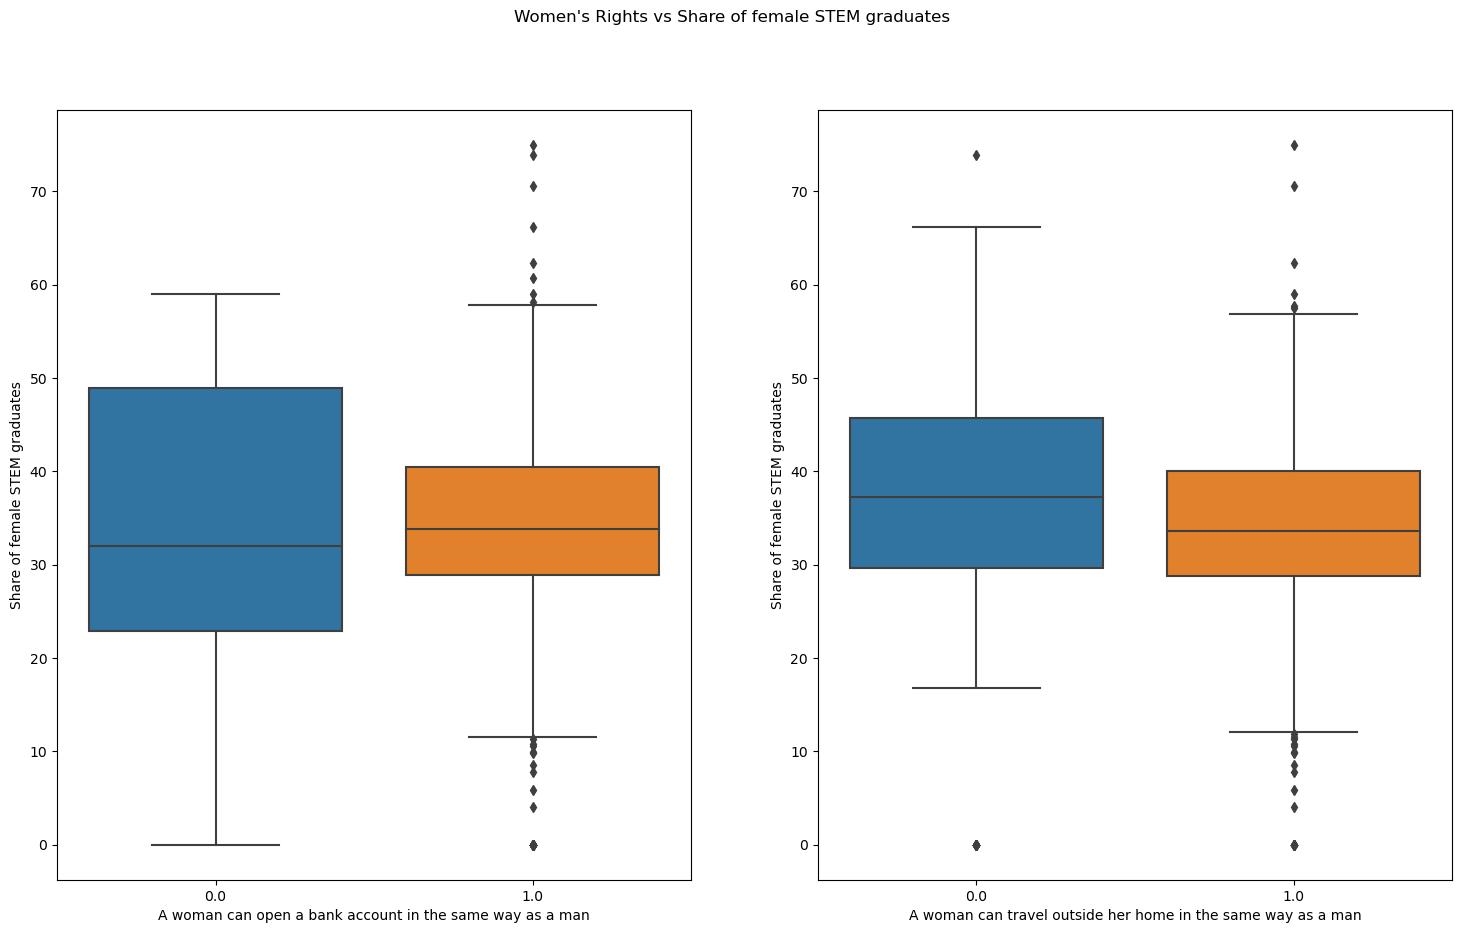

In [55]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize = (18, 10))
fig.suptitle("Women's Rights vs Share of female STEM graduates")

# Plot 1: A woman can open a bank account in the same way as a man vs Female Share of STEM graduates 
sns.boxplot(data=merged_data, x="A woman can open a bank account in the same way as a man (1=yes; 0=no)", y="Share of STEM Graduates", ax=axes[0])
axes[0].set_xlabel('A woman can open a bank account in the same way as a man')
axes[0].set_ylabel('Share of female STEM graduates')
# Plot 2: A woman can travel outside her home in the same way as a man vs Share of female STEM graduates
sns.boxplot(data=merged_data, x="A woman can travel outside her home in the same way as a man (1=yes; 0=no)", y="Share of STEM Graduates", ax=axes[1])
axes[1].set_xlabel('A woman can travel outside her home in the same way as a man')
axes[1].set_ylabel('Share of female STEM graduates')

### Visualize a few features with line plot


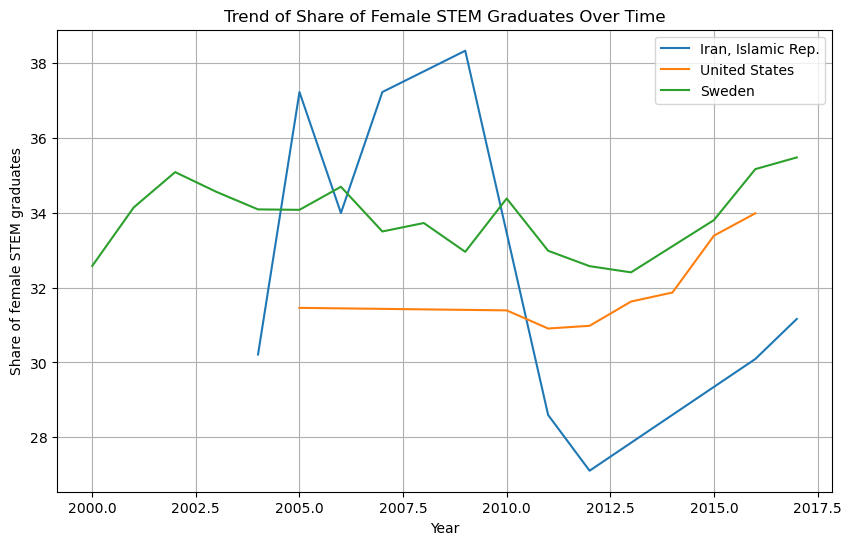

In [56]:
# Filter the data for specific countries or regions of interest
countries_of_interest = ['Iran, Islamic Rep.', 'United States', 'Sweden']
data_filtered = merged_data[merged_data['Country Name'].isin(countries_of_interest)]

# Group the data by year and calculate the mean share of female STEM graduates for each year
mean_share_stem_by_year = data_filtered.groupby('Year')['Share of STEM Graduates'].mean().reset_index()

# Plotting the trend of share of female STEM graduates over time
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = data_filtered[data_filtered['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Share of STEM Graduates'], label=country)

plt.xlabel('Year')
plt.ylabel('Share of female STEM graduates')
plt.title('Trend of Share of Female STEM Graduates Over Time')
plt.legend()
plt.grid(True)
plt.show()


## Feature Scaling

#### Evaluate Column DataTypes - which columns might need scaling? 

In [57]:
dtypes = pd.DataFrame(merged_data.dtypes)
dtypes

0
Country Name                                         object
Country Code                                         object
Year                                                  int64
A woman can be head of household in the same wa...  float64
A woman can choose where to live in the same wa...  float64
A woman can get a job in the same way as a man ...  float64
A woman can obtain a judgment of divorce in the...  float64
A woman can open a bank account in the same way...  float64
A woman can register a business in the same way...  float64
A woman can sign a contract in the same way as ...  float64
A woman can travel outside her home in the same...  float64
A woman can work at night in the same way as a ...  float64
A woman can work in a job deemed dangerous in t...  float64
A woman can work in an industrial job in the sa...  float64
A woman has the same rights to remarry as a man...  float64
Adolescent fertility rate (births per 1,000 wom...  float64
Age dependency ratio (% of working-age population)  float64
Criminal penalties or civil remedies exist for ...  float64
Dismissal of pregnant workers is prohibited (1=...  float64
Fertility rate, total (births per woman)            float64
GDP (current US$)                                   float64
GDP per capita (Current US$)                        float64
Inflation, consumer prices (annual %)               float64
Law mandates equal remuneration for females and...  float64
Length of paid maternity leave (calendar days)      float64
Length of paid parental leave for father (calen...  float64
Length of paid parental leave for mother (calen...  float64
Length of paid paternity leave (calendar days)      float64
Life expectancy at age 60, female (years)           float64
Paid leave is available to fathers (1=yes; 0=no)    float64
Paid leave of at least 14 weeks available to mo...  float64
Population ages 65 and above, female                float64
Population, female (% of total)                     float64
Primary education, pupils (% female)                float64
Rural population (% of total population)            float64
School enrollment, primary, female (% gross)        float64
School enrollment, secondary, female (% gross)      float64
School enrollment, tertiary (% gross)               float64
Secondary education, vocational pupils              float64
Sex ratio at birth (male births per female births)  float64
Sons and daughters have equal rights to inherit...  float64
The age at which men and women can retire with ...  float64
The age at which men and women can retire with ...  float64
The government administers 100% of maternity le...  float64
The law grants spouses equal administrative aut...  float64
The law is free of legal provisions that requir...  float64
The law prohibits discrimination in access to c...  float64
The law prohibits discrimination in employment ...  float64
The law provides for the valuation of nonmoneta...  float64
The mandatory retirement age for men and women ...  float64
There are periods of absence due to childcare a...  float64
There is legislation specifically addressing do...  float64
There is paid parental leave (1=yes; 0=no)          float64
Vocational and Technical enrolment (% of total ...  float64
Share of STEM Graduates                             float64

### Isolate numeric datatypes & visualize their distributions

In [58]:
non_category = merged_data.drop(columns =[
'A woman can be head of household in the same way as a man (1=yes; 0=no)',
'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
'A woman can get a job in the same way as a man (1=yes; 0=no)',
'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
'A woman can open a bank account in the same way as a man (1=yes; 0=no)', 
'A woman can register a business in the same way as a man (1=yes; 0=no)', 
'A woman can sign a contract in the same way as a man (1=yes; 0=no)',
'A woman can travel outside her home in the same way as a man (1=yes; 0=no)', 
'A woman can work at night in the same way as a man (1=yes; 0=no)',
'A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no)',
'A woman can work in an industrial job in the same way as a man (1=yes; 0=no)',
'A woman has the same rights to remarry as a man (1=yes; 0=no)',
'Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no)', 
'The age at which men and women can retire with full pension benefits is the same (1=yes; 0=no)', 
'The age at which men and women can retire with partial pension benefits is the same (1=yes; 0=no)', 
'The government administers 100% of maternity leave benefits (1=yes; 0=no)', 
'The law grants spouses equal administrative authority over assets during marriage (1=yes; 0=no)', 
'The law is free of legal provisions that require a married woman to obey her husband (1=yes; 0=no)', 
'The law prohibits discrimination in access to credit based on gender (1=yes; 0=no)', 
'The law prohibits discrimination in employment based on gender (1=yes; 0=no)', 
'The law provides for the valuation of nonmonetary contributions (1=yes; 0=no)', 
'The mandatory retirement age for men and women is the same (1=yes; 0=no)', 
'There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no)', 
'There is legislation specifically addressing domestic violence (1=yes; 0=no)', 
'There is paid parental leave (1=yes; 0=no)',
'Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no)',
'Dismissal of pregnant workers is prohibited (1=yes; 0=no)',
'Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no)',
'Paid leave is available to fathers (1=yes; 0=no)',                             
'Paid leave of at least 14 weeks available to mothers (1=yes; 0=no)',
'Country Name',
'Length of paid maternity leave (calendar days)',                                
'Length of paid parental leave for father (calendar days)',                      
'Length of paid parental leave for mother (calendar days)',                      
'Length of paid paternity leave (calendar days)'                                
])

non_category

Country Code  Year  \
0             ALB  2000   
1             ALB  2003   
2             ALB  2011   
3             ALB  2015   
4             ALB  2016   
...           ...   ...   
1157          PSE  2018   
1158          ZWE  2010   
1159          ZWE  2011   
1160          ZWE  2012   
1161          ZWE  2015   

      Adolescent fertility rate (births per 1,000 women ages 15-19)  \
0                                                14.792               
1                                                15.231               
2                                                20.692               
3                                                20.276               
4                                                18.171               
...                                                 ...               
1157                                             46.596               
1158                                            110.566               
1159                                            110.219               
1160                                            109.796               
1161                                            102.084               

      Age dependency ratio (% of working-age population)  \
0                                             59.657295    
1                                             56.621576    
2                                             47.514060    
3                                             46.413119    
4                                             46.552893    
...                                                 ...    
1157                                          76.251685    
1158                                          85.564568    
1159                                          86.400495    
1160                                          86.717122    
1161                                          85.083365    

      Fertility rate, total (births per woman)  GDP (current US$)  \
0                                        2.231       3.480355e+09   
1                                        1.978       5.611496e+09   
2                                        1.671       1.289076e+10   
3                                        1.613       1.138685e+10   
4                                        1.551       1.186120e+10   
...                                        ...                ...   
1157                                     3.712       1.627660e+10   
1158                                     4.025       1.204166e+10   
1159                                     4.096       1.410192e+10   
1160                                     4.096       1.711485e+10   
1161                                     3.849       1.996312e+10   

      GDP per capita (Current US$)  Inflation, consumer prices (annual %)  \
0                      1126.683340                               0.050018   
1                      1846.120121                               0.484003   
2                      4437.141161                               3.429123   
3                      3952.803574                               1.896174   
4                      4124.055390                               1.275432   
...                            ...                                    ...   
1157                   3562.330943                              -0.195108   
1158                    937.840340                               3.022670   
1159                   1082.615773                               3.466130   
1160                   1290.193957                               3.725327   
1161                   1410.329173                              -2.430968   

      Life expectancy at age 60, female (years)  \
0                                       22.5065   
1                                       22.7502   
2                                       23.4861   
3                                       23.5797   
4                                       23.7142   
...                                         ..

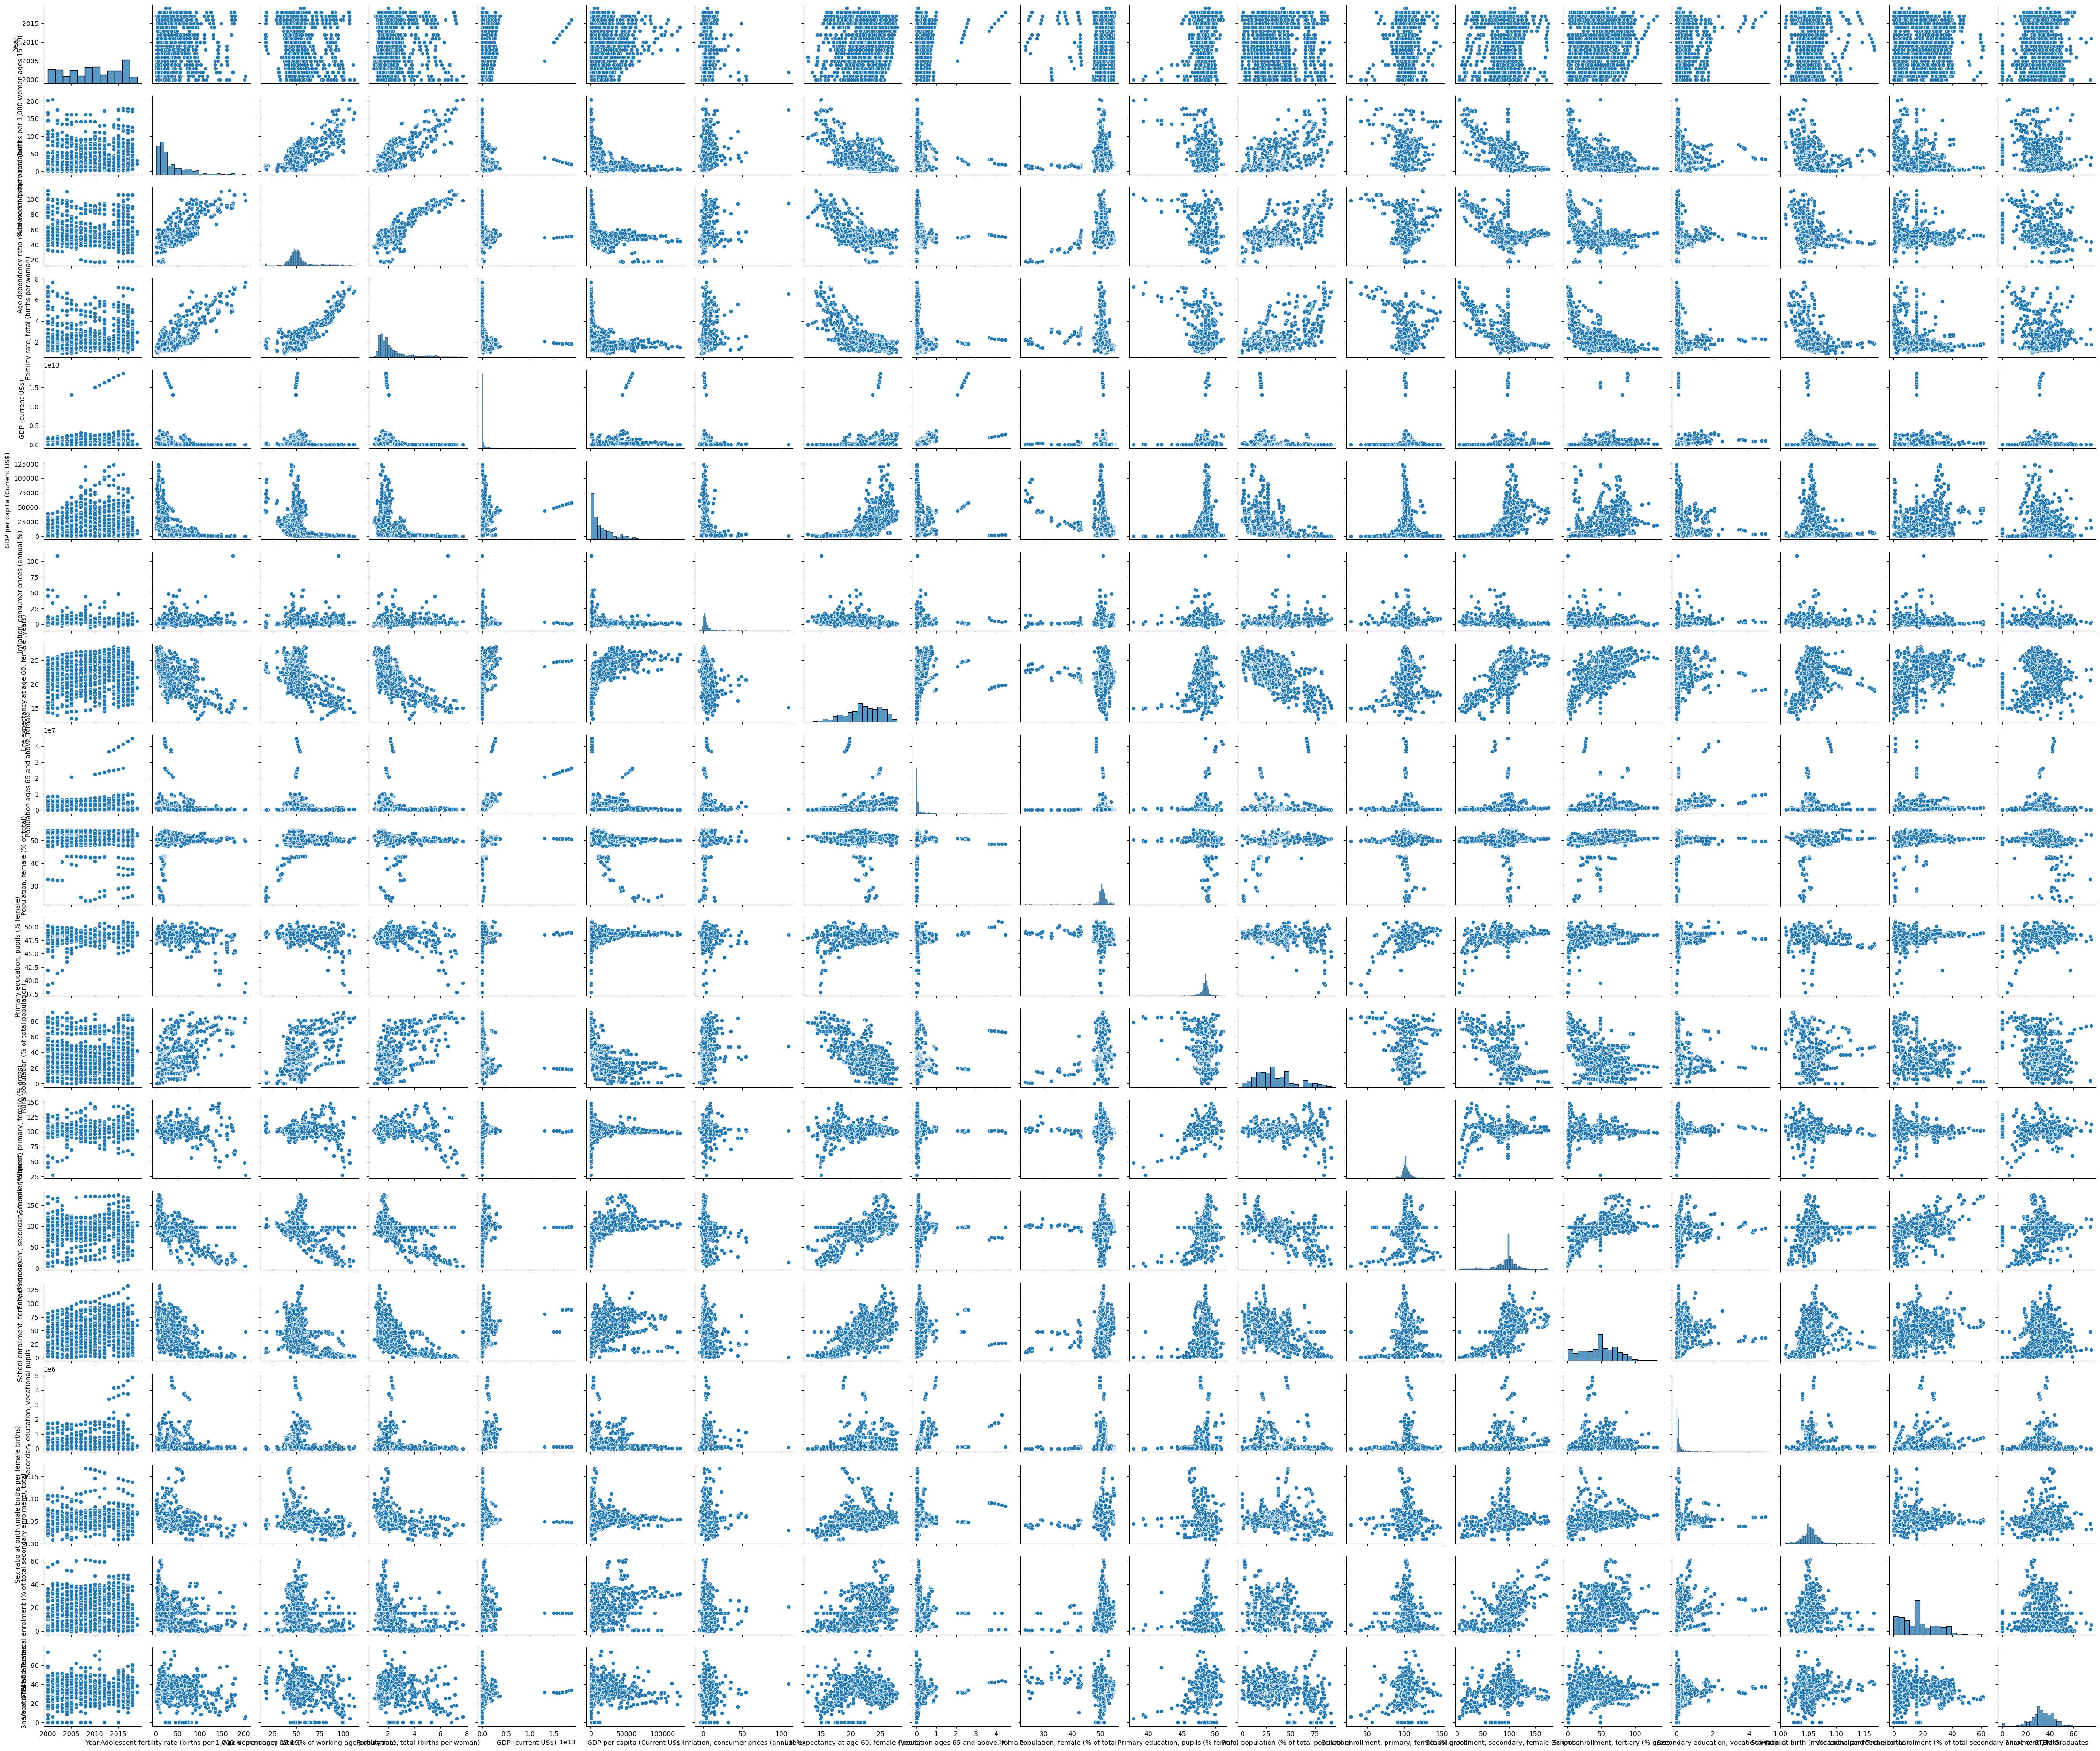

In [26]:
sns.pairplot(non_category, aspect=1.2, height=2);

The numeric data is not normal, and there do appears to be outliers. 

Thus, we will select a data standardization technique that is not sensititive to outliers in hopes that our models will perform better. 

#### Before scaling, transform categorical variables that are not yet numeric using get_dummies. Drop the first category. 

In [59]:
merged_data

Country Name Country Code  Year  \
0                Albania          ALB  2000   
1                Albania          ALB  2003   
2                Albania          ALB  2011   
3                Albania          ALB  2015   
4                Albania          ALB  2016   
...                  ...          ...   ...   
1157  West Bank and Gaza          PSE  2018   
1158            Zimbabwe          ZWE  2010   
1159            Zimbabwe          ZWE  2011   
1160            Zimbabwe          ZWE  2012   
1161            Zimbabwe          ZWE  2015   

      A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1157                                                1.0                         
1158                                                1.0                         
1159                                                1.0                         
1160                                                1.0                         
1161                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1157                                                0.0                         
1158                                                1.0                         
1159                                                1.0                         
1160                                                1.0                         
1161                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                   1.0              
1                                                   1.0              
2                                                   1.0              
3                                                   1.0              
4                                                   1.0              
...                                                 ...              
1157                                                0.0              
1158                                                1.0              
1159                                                1.0              
1160                                                1.0              
1161                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                                 
1                                                   1.0                                 
2                                                   1.0                                 
3                                                   1.0                                 
4                                                   1.0                                 
...                                                 ...                                 
1157                                 

#### Create a df that has the country names as index

In [60]:
merged_data.set_index(['Country Name', 'Country Code'], inplace=True)
merged_data

Year  \
Country Name       Country Code         
Albania            ALB           2000   
                   ALB           2003   
                   ALB           2011   
                   ALB           2015   
                   ALB           2016   
...                               ...   
West Bank and Gaza PSE           2018   
Zimbabwe           ZWE           2010   
                   ZWE           2011   
                   ZWE           2012   
                   ZWE           2015   

                                 A woman can be head of household in the same way as a man (1=yes; 0=no)  \
Country Name       Country Code                                                                            
Albania            ALB                                                         1.0                         
                   ALB                                                         1.0                         
                   ALB                                                         1.0                         
                   ALB                                                         1.0                         
                   ALB                                                         1.0                         
...                                                                            ...                         
West Bank and Gaza PSE                                                         1.0                         
Zimbabwe           ZWE                                                         1.0                         
                   ZWE                                                         1.0                         
                   ZWE                                                         1.0                         
                   ZWE                                                         1.0                         

                                 A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
Country Name       Country Code                                                                            
Albania            ALB                                                         1.0                         
                   ALB                                                         1.0                         
                   ALB                                                         1.0                         
                   ALB                                                         1.0                         
                   ALB                                                         1.0                         
...                                                                            ...                         
West Bank and Gaza PSE                                                         0.0                         
Zimbabwe           ZWE                                                         1.0                         
                   ZWE                                                         1.0                         
                   ZWE                                                         1.0                         
                   ZWE                                                         1.0                         

                                 A woman can get a job in the same way as a man (1=yes; 0=no)  \
Country Name       Country Code                                                                 
Albania            ALB                                                         1.0              
                   ALB                                                         1.0              
                   ALB                                                         1.0              
                   ALB                                                         1.0              
                   ALB                                                         1.0              
...       

#### Transform Categorical Vars to Dummies

In [61]:
transformed_data = pd.get_dummies(merged_data, drop_first=True,dtype=int)

#### Transform the data using RobustScaler() & Print out the first ten rows. 

In [62]:
transformer = RobustScaler()

transformed_data[['Year','Adolescent fertility rate (births per 1,000 women ages 15-19)',	
'Age dependency ratio (% of working-age population)',
'Fertility rate, total (births per woman)',	
'GDP (current US$)',	
'GDP per capita (Current US$)',	
'Inflation, consumer prices (annual %)',
'Length of paid maternity leave (calendar days)',
'Length of paid parental leave for mother (calendar days)',	
'Length of paid paternity leave (calendar days)',	
'Life expectancy at age 60, female (years)',
'Population ages 65 and above, female',
"Population, female (% of total)",	
'Primary education, pupils (% female)',	
'Rural population (% of total population)',
'School enrollment, primary, female (% gross)',	
'School enrollment, secondary, female (% gross)',	
'School enrollment, tertiary (% gross)',
'Secondary education, vocational pupils',	
'Sex ratio at birth (male births per female births)',
'Vocational and Technical enrolment (% of total secondary enrolment), total',	
'Share of STEM Graduates']] = transformer.fit_transform(transformed_data[['Year','Adolescent fertility rate (births per 1,000 women ages 15-19)',	
                                                        'Age dependency ratio (% of working-age population)',
                                                        'Fertility rate, total (births per woman)',	
                                                        'GDP (current US$)',	
                                                        'GDP per capita (Current US$)',	
                                                        'Inflation, consumer prices (annual %)',
                                                        'Length of paid maternity leave (calendar days)',
                                                        'Length of paid parental leave for mother (calendar days)',	
                                                        'Length of paid paternity leave (calendar days)',	
                                                        'Life expectancy at age 60, female (years)',
                                                        'Population ages 65 and above, female',
                                                        "Population, female (% of total)",	
                                                        'Primary education, pupils (% female)',	
                                                        'Rural population (% of total population)',
                                                        'School enrollment, primary, female (% gross)',	
                                                        'School enrollment, secondary, female (% gross)',	
                                                        'School enrollment, tertiary (% gross)',
                                                        'Secondary education, vocational pupils',	
                                                        'Sex ratio at birth (male births per female births)',
                                                        'Vocational and Technical enrolment (% of total secondary enrolment), total',	
                                                        'Share of STEM Graduates']])
transformed_data = pd.DataFrame(transformed_data)

In [63]:
transformed_data.to_csv('transformed_data.csv')

### CSV of the country index dataset

In [64]:
transformer = RobustScaler()

merged_data[['Year','Adolescent fertility rate (births per 1,000 women ages 15-19)',	
'Age dependency ratio (% of working-age population)',
'Fertility rate, total (births per woman)',	
'GDP (current US$)',	
'GDP per capita (Current US$)',	
'Inflation, consumer prices (annual %)',
'Length of paid maternity leave (calendar days)',
'Length of paid parental leave for mother (calendar days)',	
'Length of paid paternity leave (calendar days)',	
'Life expectancy at age 60, female (years)',
'Population ages 65 and above, female',
"Population, female (% of total)",	
'Primary education, pupils (% female)',	
'Rural population (% of total population)',
'School enrollment, primary, female (% gross)',	
'School enrollment, secondary, female (% gross)',	
'School enrollment, tertiary (% gross)',
'Secondary education, vocational pupils',	
'Sex ratio at birth (male births per female births)',
'Vocational and Technical enrolment (% of total secondary enrolment), total',	
'Share of STEM Graduates']] = transformer.fit_transform(merged_data[['Year','Adolescent fertility rate (births per 1,000 women ages 15-19)',	
                                                        'Age dependency ratio (% of working-age population)',
                                                        'Fertility rate, total (births per woman)',	
                                                        'GDP (current US$)',	
                                                        'GDP per capita (Current US$)',	
                                                        'Inflation, consumer prices (annual %)',
                                                        'Length of paid maternity leave (calendar days)',
                                                        'Length of paid parental leave for mother (calendar days)',	
                                                        'Length of paid paternity leave (calendar days)',	
                                                        'Life expectancy at age 60, female (years)',
                                                        'Population ages 65 and above, female',
                                                        "Population, female (% of total)",	
                                                        'Primary education, pupils (% female)',	
                                                        'Rural population (% of total population)',
                                                        'School enrollment, primary, female (% gross)',	
                                                        'School enrollment, secondary, female (% gross)',	
                                                        'School enrollment, tertiary (% gross)',
                                                        'Secondary education, vocational pupils',	
                                                        'Sex ratio at birth (male births per female births)',
                                                        'Vocational and Technical enrolment (% of total secondary enrolment), total',	
                                                        'Share of STEM Graduates']])
merged_transform_data = pd.DataFrame(merged_data)

In [65]:
merged_transform_data.to_csv('country_index.csv')

The Country_Name column has been transformed which has significantly increased our number of columns. 

### References:

- https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- Lab 2 from EDA
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html